In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('GOOG.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


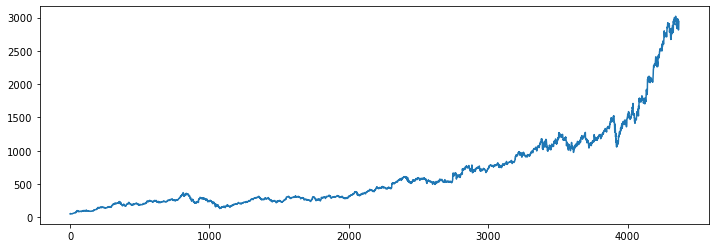

In [4]:
df['Open'].plot(figsize=(12,4))

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369 entries, 0 to 4368
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4369 non-null   object 
 1   Open       4369 non-null   float64
 2   High       4369 non-null   float64
 3   Low        4369 non-null   float64
 4   Close      4369 non-null   float64
 5   Adj Close  4369 non-null   float64
 6   Volume     4369 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 239.1+ KB


In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.set_index('Date',inplace=True)

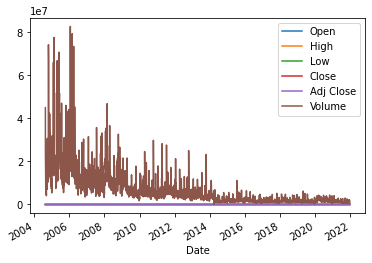

In [10]:
df.plot()

In [49]:
df1=df.reset_index()['Open']

In [50]:
df1

0         49.813290
1         50.316402
2         55.168217
3         55.412300
4         52.284027
           ...     
4364    2854.290039
4365    2813.592041
4366    2863.000000
4367    2882.000000
4368    2941.790039
Name: Open, Length: 4369, dtype: float64

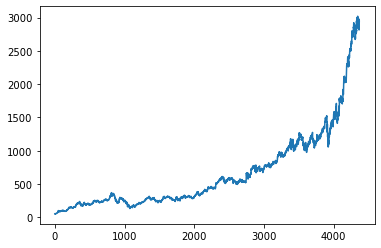

In [51]:
plt.plot(df1)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
print(df1)

[[1.35827890e-04]
 [3.05192214e-04]
 [1.93847539e-03]
 ...
 [9.47148550e-01]
 [9.53544585e-01]
 [9.73671912e-01]]


In [54]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [55]:
training_size,test_size

(2621, 1748)

In [56]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [57]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
print(X_train.shape), print(y_train.shape)

(2520, 100)
(2520,)


(None, None)

In [59]:
print(X_test.shape), print(ytest.shape)

(1647, 100)
(1647,)


(None, None)

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [61]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
40/40 [==============================] - 43s 422ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 2/100
40/40 [==============================] - 16s 391ms/step - loss: 3.9533e-05 - val_loss: 6.8403e-04
Epoch 3/100
40/40 [==============================] - 13s 334ms/step - loss: 3.0658e-05 - val_loss: 6.4592e-04
Epoch 4/100
40/40 [==============================] - 13s 330ms/step - loss: 2.9338e-05 - val_loss: 8.0893e-04
Epoch 5/100
40/40 [==============================] - 13s 331ms/step - loss: 2.9985e-05 - val_loss: 8.2148e-04
Epoch 6/100
40/40 [==============================] - 14s 357ms/step - loss: 3.0250e-05 - val_loss: 7.1534e-04
Epoch 7/100
40/40 [==============================] - 14s 350ms/step - loss: 2.7728e-05 - val_loss: 4.9028e-04
Epoch 8/100
40/40 [==============================] - 13s 334ms/step - loss: 2.6580e-05 - val_loss: 4.7788e-04
Epoch 9/100
40/40 [==============================] - 13s 331ms/step - loss: 2.5815e-05 - val_loss: 4.3791e-04
Epoch 10/100
40/40

Epoch 75/100
40/40 [==============================] - 13s 331ms/step - loss: 9.5843e-06 - val_loss: 2.2765e-04
Epoch 76/100
40/40 [==============================] - 14s 351ms/step - loss: 8.8296e-06 - val_loss: 1.4051e-04
Epoch 77/100
40/40 [==============================] - 14s 354ms/step - loss: 8.5382e-06 - val_loss: 1.2741e-04
Epoch 78/100
40/40 [==============================] - 13s 333ms/step - loss: 9.4509e-06 - val_loss: 2.3275e-04
Epoch 79/100
40/40 [==============================] - 13s 331ms/step - loss: 8.0436e-06 - val_loss: 2.7438e-04
Epoch 80/100
40/40 [==============================] - 13s 324ms/step - loss: 1.1440e-05 - val_loss: 1.4617e-04
Epoch 81/100
40/40 [==============================] - 15s 387ms/step - loss: 1.0409e-05 - val_loss: 1.6109e-04
Epoch 82/100
40/40 [==============================] - 14s 346ms/step - loss: 7.5823e-06 - val_loss: 1.6677e-04
Epoch 83/100
40/40 [==============================] - 13s 331ms/step - loss: 8.0771e-06 - val_loss: 1.6059e-04
E

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [66]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

321.1125650224178

In [68]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1398.8082501319384

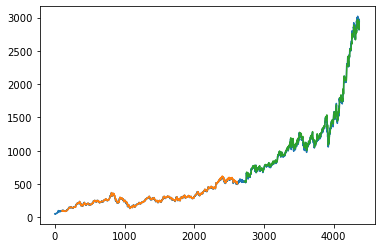

In [69]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [70]:
len(test_data)

1748

In [71]:
x_input=test_data[1648:].reshape(1,-1)
x_input.shape

(1, 100)

In [72]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [73]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9439805]
101
1 day input [0.89920187 0.90099607 0.90539926 0.91301058 0.91438062 0.91054303
 0.9148822  0.91247531 0.91376127 0.90652028 0.89542485 0.90630142
 0.91919787 0.93633256 0.9453509  0.94357018 0.94016341 0.95761451
 0.96555901 0.96398022 0.96599665 0.95385426 0.95791745 0.96225333
 0.9588196  0.96258997 0.94749192 0.95395527 0.95124872 0.96041861
 0.95151468 0.91920929 0.92672839 0.92628065 0.93677685 0.93230972
 0.93661528 0.91980382 0.90648124 0.88773275 0.88254526 0.8969868
 0.88554463 0.88975592 0.9182856  0.92530781 0.92459411 0.92350005
 0.91079214 0.92561749 0.94075251 0.93411074 0.94810125 0.95436932
 0.94069868 0.92830382 0.91793212 0.93002068 0.92528422 0.97508239
 0.96310494 0.9809129  0.95832074 0.96818814 0.97441586 0.98891468
 0.99326733 0.99155721 0.97986766 0.97378968 0.9786675  0.99326733
 0.98768255 0.98807647 0.98751761 1.         0.99422167 0.97383012
 0.96869309 0.95970836 0.95488101 0.96263533 0.95430201 0.93822102
 0.95620733 0.95000319 0.96600002 0

8 day output [[0.9235883]]
9 day input [0.91376127 0.90652028 0.89542485 0.90630142 0.91919787 0.93633256
 0.9453509  0.94357018 0.94016341 0.95761451 0.96555901 0.96398022
 0.96599665 0.95385426 0.95791745 0.96225333 0.9588196  0.96258997
 0.94749192 0.95395527 0.95124872 0.96041861 0.95151468 0.91920929
 0.92672839 0.92628065 0.93677685 0.93230972 0.93661528 0.91980382
 0.90648124 0.88773275 0.88254526 0.8969868  0.88554463 0.88975592
 0.9182856  0.92530781 0.92459411 0.92350005 0.91079214 0.92561749
 0.94075251 0.93411074 0.94810125 0.95436932 0.94069868 0.92830382
 0.91793212 0.93002068 0.92528422 0.97508239 0.96310494 0.9809129
 0.95832074 0.96818814 0.97441586 0.98891468 0.99326733 0.99155721
 0.97986766 0.97378968 0.9786675  0.99326733 0.98768255 0.98807647
 0.98751761 1.         0.99422167 0.97383012 0.96869309 0.95970836
 0.95488101 0.96263533 0.95430201 0.93822102 0.95620733 0.95000319
 0.96600002 0.98203383 0.98098695 0.98720793 0.98279126 0.95805544
 0.9553355  0.98032042 0

16 day output [[0.8977252]]
17 day input [0.94016341 0.95761451 0.96555901 0.96398022 0.96599665 0.95385426
 0.95791745 0.96225333 0.9588196  0.96258997 0.94749192 0.95395527
 0.95124872 0.96041861 0.95151468 0.91920929 0.92672839 0.92628065
 0.93677685 0.93230972 0.93661528 0.91980382 0.90648124 0.88773275
 0.88254526 0.8969868  0.88554463 0.88975592 0.9182856  0.92530781
 0.92459411 0.92350005 0.91079214 0.92561749 0.94075251 0.93411074
 0.94810125 0.95436932 0.94069868 0.92830382 0.91793212 0.93002068
 0.92528422 0.97508239 0.96310494 0.9809129  0.95832074 0.96818814
 0.97441586 0.98891468 0.99326733 0.99155721 0.97986766 0.97378968
 0.9786675  0.99326733 0.98768255 0.98807647 0.98751761 1.
 0.99422167 0.97383012 0.96869309 0.95970836 0.95488101 0.96263533
 0.95430201 0.93822102 0.95620733 0.95000319 0.96600002 0.98203383
 0.98098695 0.98720793 0.98279126 0.95805544 0.9553355  0.98032042
 0.94421649 0.93051618 0.94714855 0.95354459 0.97367191 0.94398052
 0.94669044 0.94533002 0.9422

25 day output [[0.87447387]]
26 day input [0.96258997 0.94749192 0.95395527 0.95124872 0.96041861 0.95151468
 0.91920929 0.92672839 0.92628065 0.93677685 0.93230972 0.93661528
 0.91980382 0.90648124 0.88773275 0.88254526 0.8969868  0.88554463
 0.88975592 0.9182856  0.92530781 0.92459411 0.92350005 0.91079214
 0.92561749 0.94075251 0.93411074 0.94810125 0.95436932 0.94069868
 0.92830382 0.91793212 0.93002068 0.92528422 0.97508239 0.96310494
 0.9809129  0.95832074 0.96818814 0.97441586 0.98891468 0.99326733
 0.99155721 0.97986766 0.97378968 0.9786675  0.99326733 0.98768255
 0.98807647 0.98751761 1.         0.99422167 0.97383012 0.96869309
 0.95970836 0.95488101 0.96263533 0.95430201 0.93822102 0.95620733
 0.95000319 0.96600002 0.98203383 0.98098695 0.98720793 0.98279126
 0.95805544 0.9553355  0.98032042 0.94421649 0.93051618 0.94714855
 0.95354459 0.97367191 0.94398052 0.94669044 0.94533002 0.94228816
 0.93868345 0.9349103  0.93109965 0.92731166 0.92358828 0.91995931
 0.91644436 0.913051

In [74]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [75]:
len(df1)

4369

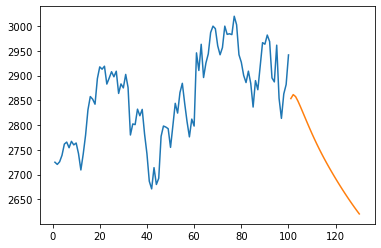

In [76]:
plt.plot(day_new,scaler.inverse_transform(df1[4269:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

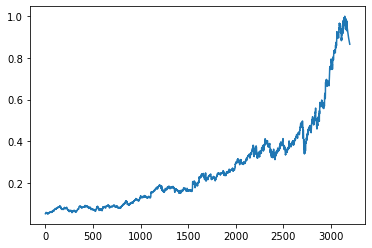

In [77]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [78]:
df3=scaler.inverse_transform(df3).tolist()

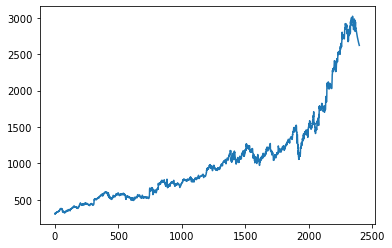

In [79]:
plt.plot(df3[2000:])